In [1]:
cd ../src

/home/richard/Desktop/software/upload/epicluster-results/src


In [2]:
import datetime
import random
import numpy as np
import pandas
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import copy
import scipy.stats
import branchpro
import epicluster as ec

In [3]:
random.seed(123)
np.random.seed(123)

In [4]:
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']

w = w[:14]
w = w / sum(w)

In [5]:
cases = pandas.read_csv('../data/covid/VIC.csv')
imp_cases = cases['Imported_Cases']

a = 1
b = 5

# Transform our incidence data into pandas dataframes
inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(cases['Time'])),
        'Incidence Number': cases['Incidence_Number']
    }
)

imp_data = pd.DataFrame(
    {
        'Time': np.arange(len(cases['Time'])),
        'Incidence Number': cases['Imported_Cases']
    }
)

inference = branchpro.LocImpBranchProPosterior(
    inc_data=inc_data,
    imported_inc_data=imp_data,
    epsilon=1,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=0)
intervals0 = inference.get_intervals(central_prob=.9)

cases = cases['Incidence_Number']


past_cases = np.zeros(len(w))
forward_cases = copy.deepcopy(np.asarray(inc_data['Incidence Number']))
inf_cases = np.concatenate([past_cases, forward_cases])

imp_cases = np.asarray(imp_data['Incidence Number'])
imp_cases = np.concatenate([past_cases, imp_cases])


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5, imported_cases=imp_cases, epsilon=1.0)
mcmc = ec.MCMCSampler(p, 4)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.01, progress=True)


# load epifilter
epi_results = pd.read_csv('../data/covid/results/VIC_R.csv')


results_vic = cases, imp_cases, w, phi_chain, z_chain, intervals7, intervals0, epi_results

Iter=50, Rhat=6.931489597110628
Iter=100, Rhat=3.210919507446318
Iter=150, Rhat=1.6444243892272015
Iter=200, Rhat=1.3725903847943481
Iter=250, Rhat=1.1390730449233926
Iter=300, Rhat=1.1619771275462272
Iter=350, Rhat=1.1580246244195616
Iter=400, Rhat=1.1234821556762562
Iter=450, Rhat=1.1285847051966684
Iter=500, Rhat=1.0516008749059813
Iter=550, Rhat=1.040966716608417
Iter=600, Rhat=1.1253238075836174
Iter=650, Rhat=1.1248622882522725
Iter=700, Rhat=1.1596260171885526
Iter=750, Rhat=1.1281138239068904
Iter=800, Rhat=1.1173757445511803
Iter=850, Rhat=1.1319946680607142
Iter=900, Rhat=1.1005209483507046
Iter=950, Rhat=1.082633847986423
Iter=1000, Rhat=1.074451567268516
Iter=1050, Rhat=1.064341786204256
Iter=1100, Rhat=1.1064524499000261
Iter=1150, Rhat=1.1341538229624875
Iter=1200, Rhat=1.1112988593298272
Iter=1250, Rhat=1.0937335141865572
Iter=1300, Rhat=1.0784190017834696
Iter=1350, Rhat=1.063825825990124
Iter=1400, Rhat=1.0834243065792895
Iter=1450, Rhat=1.1376970566480349
Iter=1500, R

In [6]:
cases = pandas.read_csv('../data/covid/QLD.csv')
imp_cases = cases['Imported_Cases']

a = 1
b = 5

# Transform our incidence data into pandas dataframes
inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(cases['Time'])),
        'Incidence Number': cases['Incidence_Number']
    }
)

imp_data = pd.DataFrame(
    {
        'Time': np.arange(len(cases['Time'])),
        'Incidence Number': cases['Imported_Cases']
    }
)

inference = branchpro.LocImpBranchProPosterior(
    inc_data=inc_data,
    imported_inc_data=imp_data,
    epsilon=1,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=0)
intervals0 = inference.get_intervals(central_prob=.9)

cases = cases['Incidence_Number']


past_cases = np.zeros(len(w))
forward_cases = copy.deepcopy(np.asarray(inc_data['Incidence Number']))
inf_cases = np.concatenate([past_cases, forward_cases])

imp_cases = np.asarray(imp_data['Incidence Number'])
imp_cases = np.concatenate([past_cases, imp_cases])


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5, imported_cases=imp_cases, epsilon=1.0)
mcmc = ec.MCMCSampler(p, 4)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.005, progress=True)


# load epifilter
epi_results = pd.read_csv('../data/covid/results/QLD_R.csv')


results_qld = cases, imp_cases, w, phi_chain, z_chain, intervals7, intervals0, epi_results

Iter=50, Rhat=7.441959899210079
Iter=100, Rhat=3.084345718167113
Iter=150, Rhat=1.5077454688679939
Iter=200, Rhat=1.320439849277347
Iter=250, Rhat=1.2606722422073577
Iter=300, Rhat=1.2156399931353843
Iter=350, Rhat=1.215089492926349
Iter=400, Rhat=1.2185115196825398
Iter=450, Rhat=1.1605770361268417
Iter=500, Rhat=1.0816293124355374
Iter=550, Rhat=1.038712449599892
Iter=600, Rhat=1.111645306685539
Iter=650, Rhat=1.043642466751404
Iter=700, Rhat=1.0443917314632032
Iter=750, Rhat=1.0778918138202347
Iter=800, Rhat=1.0927575372532905
Iter=850, Rhat=1.0892218713843946
Iter=900, Rhat=1.0611322927060445
Iter=950, Rhat=1.0447388130856625
Iter=1000, Rhat=1.0444775276933351
Iter=1050, Rhat=1.0646525033293446
Iter=1100, Rhat=1.0498572683821141
Iter=1150, Rhat=1.0627574084339875
Iter=1200, Rhat=1.0562141590777387
Iter=1250, Rhat=1.0366786571028552
Iter=1300, Rhat=1.0226093096937248
Iter=1350, Rhat=1.0142600422124628
Iter=1400, Rhat=1.0076939887639977
Iter=1450, Rhat=1.0108834639437947
Iter=1500, R

In [7]:
cases = pandas.read_csv('../data/covid/HK.csv')
imp_cases = cases['Imported_Cases']

a = 1
b = 5

# Transform our incidence data into pandas dataframes
inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(cases['Time'])),
        'Incidence Number': cases['Incidence_Number']
    }
)

imp_data = pd.DataFrame(
    {
        'Time': np.arange(len(cases['Time'])),
        'Incidence Number': cases['Imported_Cases']
    }
)

inference = branchpro.LocImpBranchProPosterior(
    inc_data=inc_data,
    imported_inc_data=imp_data,
    epsilon=0.2,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=0)
intervals0 = inference.get_intervals(central_prob=.9)

cases = cases['Incidence_Number']


past_cases = np.zeros(len(w))
forward_cases = copy.deepcopy(np.asarray(inc_data['Incidence Number']))
inf_cases = np.concatenate([past_cases, forward_cases])

imp_cases = np.asarray(imp_data['Incidence Number'])
imp_cases = np.concatenate([past_cases, imp_cases])


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5, imported_cases=imp_cases, epsilon=0.2)
mcmc = ec.MCMCSampler(p, 4)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.005, progress=True)


# load epifilter
epi_results = pd.read_csv('../data/covid/results/HK_R.csv')


results_hk = cases, imp_cases, w, phi_chain, z_chain, intervals7, intervals0, epi_results

Iter=50, Rhat=20.90663722632999
Iter=100, Rhat=6.5377736871906125
Iter=150, Rhat=3.42799290506704
Iter=200, Rhat=3.196158736107831
Iter=250, Rhat=1.7746771394547745
Iter=300, Rhat=1.283459314497382
Iter=350, Rhat=1.364607398160523
Iter=400, Rhat=1.195165497293804
Iter=450, Rhat=1.2258345384927258
Iter=500, Rhat=1.244919385919151
Iter=550, Rhat=1.1561541323845395
Iter=600, Rhat=1.217171252952644
Iter=650, Rhat=1.2745562176635106
Iter=700, Rhat=1.224256745742996
Iter=750, Rhat=1.2684498912667592
Iter=800, Rhat=1.258692488176185
Iter=850, Rhat=1.160169973649964
Iter=900, Rhat=1.1819888897055635
Iter=950, Rhat=1.2349665764282174
Iter=1000, Rhat=1.2599858493703155
Iter=1050, Rhat=1.3079973455994718
Iter=1100, Rhat=1.2104649140211081
Iter=1150, Rhat=1.165897517808769
Iter=1200, Rhat=1.1145632578236342
Iter=1250, Rhat=1.116163312346111
Iter=1300, Rhat=1.1545131773994028
Iter=1350, Rhat=1.138327888944144
Iter=1400, Rhat=1.1619946888408785
Iter=1450, Rhat=1.1255765402314846
Iter=1500, Rhat=1.11

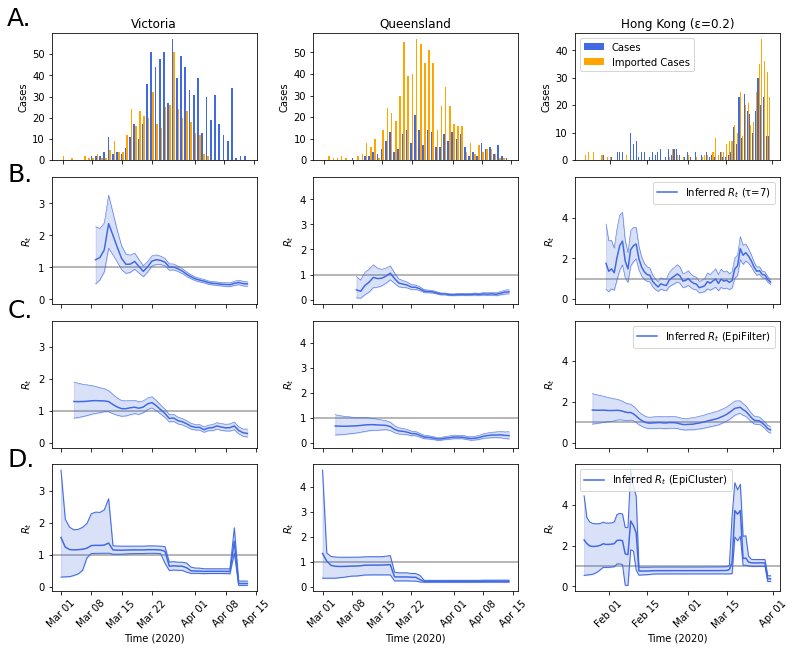

In [8]:
fig = plt.figure(figsize=(11,9))

num_exps = 3


for i in range(num_exps):
    
    do_legend = i==num_exps-1
    
    if i == 0:
        cases, imp_cases, w, phi_chain, z_chain, intervals7, intervals0, epi_results = results_vic
        date0 = (2020, 3, 1)
        
    elif i == 1:
        cases, imp_cases, w, phi_chain, z_chain, intervals7, intervals0, epi_results = results_qld
        date0 = (2020, 3, 1)
        
    elif i == 2:
        cases, imp_cases, w, phi_chain, z_chain, intervals7, intervals0, epi_results = results_hk
        date0 = (2020, 1, 23)
        
        
    ax = fig.add_subplot(4, num_exps, 1+i)
    
    ax.set_title(['Victoria', 'Queensland', 'Hong Kong (ε=0.2)'][i])

    x = np.arange(len(cases))
    x_dates = [datetime.datetime(*date0)]
    for xi in x[1:]:
        x_dates.append(x_dates[0] + datetime.timedelta(int(xi)))
    x = x_dates
    
    cases_x = [d - datetime.timedelta(0.2) for d in x]
    imp_x = [d + datetime.timedelta(0.2) for d in x]
    
    ax.bar(cases_x, cases, width=0.4, label='Cases', color='royalblue')
    ax.bar(imp_x, imp_cases[len(w):], width=0.4, label='Imported Cases', zorder=-10, color='orange')

    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (2020)')
    ax.set_ylabel('Cases')

    ax = fig.add_subplot(4, num_exps, 3*num_exps+i+1)
    Rs = []
    num_mcmc = len(z_chain)
    for phi, z in zip(phi_chain[num_mcmc//2:], z_chain[num_mcmc//2:]):
        Rs.append([phi[zi] for zi in z])
    ax.plot(x, np.mean(Rs, axis=0), color='royalblue', label='Inferred $R_t$ (EpiCluster)')
    ax.fill_between(x, np.percentile(Rs, 5, axis=0), np.percentile(Rs, 95, axis=0), color='royalblue', alpha=0.2)
    ax.plot(x, np.percentile(Rs, 5, axis=0), color='royalblue', lw=1)
    ax.plot(x, np.percentile(Rs, 95, axis=0), color='royalblue', lw=1)   
    
    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)   
    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (2020)')
    ax.set_ylabel('$R_t$')

    ax = fig.add_subplot(4, num_exps, num_exps+i+1, sharey=ax, sharex=ax)
    x_old = copy.deepcopy(x)
    x = x[8:]

    ax.plot(x, intervals7['Mean'], color='royalblue', label='Inferred $R_t$ (τ=7)')
    ax.fill_between(x, intervals7['Lower bound CI'], intervals7['Upper bound CI'], alpha=0.2, color='royalblue')
    ax.plot(x, intervals7['Lower bound CI'], color='royalblue', lw=0.5)
    ax.plot(x, intervals7['Upper bound CI'], color='royalblue', lw=0.5)

    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)  
    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (2020)')
    ax.set_ylabel('$R_t$')
    

    ax = fig.add_subplot(4, num_exps, 2*num_exps+i+1, sharey=ax, sharex=ax)

    x = x_old[3:]
    mean = epi_results['R_smooth'][1:]
    lb = epi_results['R_smooth_lower_bound'][1:]
    ub = epi_results['R_smooth_upper_bound'][1:]
    ax.plot(x, mean, color='royalblue', label='Inferred $R_t$ (EpiFilter)')
    ax.fill_between(x, lb, ub, alpha=0.2, color='royalblue')
    ax.plot(x, lb, color='royalblue', lw=0.5)
    ax.plot(x, ub, color='royalblue', lw=0.5)  

    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)
    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (2020)')
    ax.set_ylabel('$R_t$')
      
    
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    plt.xticks(rotation=45, ha='center')
    fig.autofmt_xdate(rotation=45, ha='center')

fig.set_tight_layout(True)

plt.subplots_adjust(left=0.2)
fig.text(.0, .97, 'A.', fontsize=25)
fig.text(.0, .73, 'B.', fontsize=25)
fig.text(.0, .52, 'C.', fontsize=25)
fig.text(.0, .29, 'D.', fontsize=25)

plt.savefig('../notebooks/Figure5.pdf')
plt.show()
